In [94]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import animation
plt.rcParams['animation.ffmpeg_path'] = '/home/nathan.meulenbroek/miniconda3/bin'
libraries_installed = True
import time
import scipy.optimize as root_find
%matplotlib inline

# Physics 581 Assignment 1
### Rebecca Booth and Nathan Meulenbroek

### 0: Functions needed throughout this assignment

In [2]:
def make_plot(title='', x_label='', y_label='', z_label='', x_lim=(0, 0), y_lim=(0,0), z_lim=(0,0), 
              grid=True, size=(6, 4), dpi=115, three_d=False):
    '''
    Generates a plot object
    
    Parameters:
        title - (string) title of the plot
        x - (float) a list of values for omega/omega_0
        y - (float) a list of values for the amplitude
        xlim - (float) the limit for the x axis, this is a list containing 2 variables, 
                    the max and min value of x
        ylim - (float) the limit for the y axis, this is a list containing 2 variables, 
                    the max and min value of y
        size - (int) resizing the figure of the plot
        dpi - (int) increasing the quality of the image produced
    Returns:
        plot - (object) the plot
    '''
    fig = plt.figure(figsize=(size[0], size[1]), dpi=dpi)
    plot = fig.add_subplot(111) if not three_d else fig.add_subplot(111, projection='3d')
    
    plot.set_title(title)
    if y_lim[0] != 0 and y_lim[1] !=0: plot.set_ylim(y_lim[0], y_lim[1])
    if x_lim[0] != 0 and x_lim[1] !=0: plot.set_xlim(x_lim[0], x_lim[1])
    if z_lim[0] != 0 and z_lim[1] !=0: plot.set_zlim(z_lim[0], z_lim[1])
    plot.set_xlabel(x_label)
    plot.set_ylabel(y_label)
    if three_d: plot.set_zlabel(z_label)
    if grid: plt.grid()
    
    return plot

In [27]:
def my_histogram(xvals, numbins, PDF, args = None):
    '''
    Plots a histogram of the data contained in xvals
    
    Parameters:
        xvals: 2D array of x values to be plotted in histogram
        numbins: the number of bins to sort xvals into
        PDF: the probability distribution that was sampled to get xvals
             (this puts the maximum height of the histogram lines up with the height
             of the PDF at that point)
        args: supply a tuple containing arguments if the PDF needs arguments
    
    '''
    
    # sort the xvals into bins
    height, edges = np.histogram(xvals, bins=numbins)

    # calculate the width and midpoint of each bin
    width = edges[1:] - edges[0:-1]
    midpoint = (edges[1:] + edges[0:-1])/2

    # get the value of the PDF at the point where height is at a maximum
    if args == None:
        maxval = PDF(midpoint[np.where(height==height.max())])
        
    else: 
        maxval = PDF(midpoint[np.where(height==height.max())], *args)

    # plot a bar graph representing the bins
    plt.bar(midpoint, height/height.max()*maxval, width, facecolor='#96C8A2', edgecolor='#337147');

    return

## 1. General Problems Involving Random Numbers

### 1.1 Birthday Problem

In [28]:
def equal_any(array):
    '''
    Checks if any two elements of an array are equal
    
    Params: 
        array - (iterable) array to check
    Returns:
        - (bool) True if duplicate present. Else, false
    '''
    temp = np.array(array)
    for i in range(array.size-1):
        temp = np.roll(temp, 1)

        if (temp==array).any():
            return True
    
    return False

def make_plot(title='', x_label='', y_label='', z_label='', x_lim=(0, 0), y_lim=(0,0), z_lim=(0,0), 
              grid=True, size=(6, 4), dpi=115, three_d=False):
    '''
    Generates a plot object
    
    Parameters:
        title - (string) title of the plot
        x - (float) a list of values for omega/omega_0
        y - (float) a list of values for the amplitude
        xlim - (float) the limit for the x axis, this is a list containing 2 variables, 
                    the max and min value of x
        ylim - (float) the limit for the y axis, this is a list containing 2 variables, 
                    the max and min value of y
        size - (int) resizing the figure of the plot
        dpi - (int) increasing the quality of the image produced
    Returns:
        plot - (object) the plot
    '''
    fig = plt.figure(figsize=(size[0], size[1]), dpi=dpi)
    plot = fig.add_subplot(111) if not three_d else fig.add_subplot(111, projection='3d')
    
    plot.set_title(title)
    if y_lim[0] != 0 and y_lim[1] !=0: plot.set_ylim(y_lim[0], y_lim[1])
    if x_lim[0] != 0 and x_lim[1] !=0: plot.set_xlim(x_lim[0], x_lim[1])
    if z_lim[0] != 0 and z_lim[1] !=0: plot.set_zlim(z_lim[0], z_lim[1])
    plot.set_xlabel(x_label)
    plot.set_ylabel(y_label)
    if three_d: plot.set_zlabel(z_label)
    if grid: plt.grid()
    
    return plot

def birthday_paradox(npeople, ntrials=10000, verbose=False):
    '''
    Runs a simulation of the birthday paradox, where the probability of at least two
    people out of a crowd having the same birthday is recorded
    
    Params: 
        npeople - (int) Number of people in the crowd
        ntrials - (int) Optional. Number of trials to run the simulation for
        verbose - (bool) Optional. Set to true to print results
    Returns:
        event_counter - (float) Probability of event occuring
    '''
    # One event is described as having at least one matching pair of birthdays in
    # a 30 day sample
    event_counter = 0
    
    for i in range(ntrials):
        days = np.random.choice(365, npeople)
        event_counter += 1 if equal_any(days) else 0
    
    if verbose:print("The fraction of trials for", npeople, "people with at least one matching birthday is", event_counter/ntrials)
    
    return event_counter/ntrials

The fraction of trials for 30 people with at least one matching birthday is 0.7103


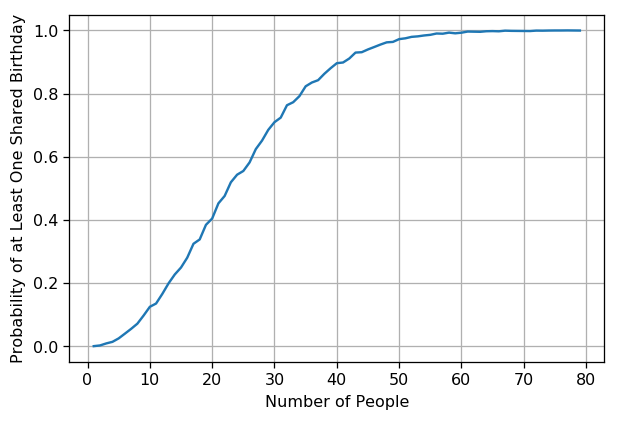

In [29]:
birthday_paradox(30, verbose=True)

x = range(1, 80)
y = [birthday_paradox(i, ntrials=5000) for i in x]

make_plot(x_label="Number of People", y_label="Probability of at Least One Shared Birthday").plot(x, y);

The following is equivalent to approximately 71% of the trials having a matching pair. Counter-intuitively, the probability of this occuring is over 50%. This is in fact a well known example of probabilities, and is due to the fact that we're looking for at least 1 pair. The probability of havings a lot of pairs 

$$P(X\geq 2)= P(X=2)+P(X=3)+\ldots$$

### 1.2 Random Numbers from a Normal Distribution

In [32]:
def normal_distribution(x, mean, sigma):
    '''
    Returns the value of the Gaussian distribution with mean and sigma given
    in the arguments at point x. 
    '''
    return np.exp(-(x-mean)**2/(2*sigma*sigma))/np.sqrt(2*np.pi*sigma*sigma)

In [34]:
def accept_reject(prob, xmin, xmax, args=None, Pmax=1, accept_count=None, total_count=None):
    '''
    Returns values from the specified probability distribution using the direct Monte Carlo method
    
    Parameters:
    prob: (function) the probability distribution to sample from
    xmin, xmax: (float) the range of x values to sample through
    args: (optional, default=None) a tuple containing any arguments required by prob
    Pmax: (optional, default = 1) 
    accept_count: Keeps track of the number of accepted points 
                  Set this to zero the first time accept_reject is called. 
    
    total_count: Keeps track of the number of accepted points
                 set this to zero the first time accept_reject is called
    '''
    
    # reset accept_count and total_count
    if accept_count is not None:
        accept_reject.accept_count = accept_count 
        
    if total_count is not None:
        accept_reject.total_count = total_count 
    
    # begin the accept reject algorithm
    
    a = xmin
    b = xmax
    
    r1 = np.random.rand()
    xtry = a + (b - a)*r1
    
    # call the PDF function differently depending on whether it has
    # arguments or not
    if args is None:
        Pxtry = prob(xtry)
    else:
        Pxtry = prob(xtry, *args)

    r2 = np.random.rand()
    
    # keep trying possible x values until one is accepted
    while (Pxtry < r2*Pmax):
        
        accept_reject.total_count +=1
        
        r1 = np.random.rand()
        xtry = a + (b - a)*r1
        
        if args is None:
            Pxtry = prob(xtry)
        else:
            Pxtry = prob(xtry, *args)
    
        r2 = np.random.rand()
    
    # increment the counters
    accept_reject.total_count +=1
    accept_reject.accept_count +=1
    
    return xtry

Run your code for $\bar{y}=5$ and $\sigma=1.25$. Do $10^6$ draws and bin them into 100 bins of width 0.1. Plot the resulting histogram and compare it to an analytical Gaussian.

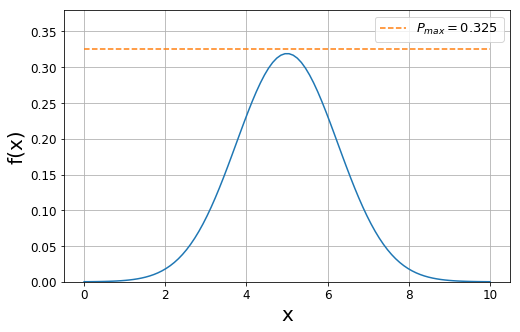

In [36]:
# plot the PDF and determine what value is appropreate for Pmax

# set the standard deviation and mean
sd = 1.25
mean = 5
xmin = mean - 4*sd
xmax = mean + 4*sd

# plot the PDF
plt.figure(figsize=(8,5))
x = np.linspace(xmin, xmax, 100)

plt.plot(x, normal_distribution(x, mean, sd))
plt.xlabel('x', fontsize=20)
plt.ylabel('f(x)', fontsize=20)


# plot Pmax
Pmax = 0.325

plt.plot(x, np.ones(100)*Pmax, '--',label='$P_{max}=0.325$')
plt.legend(loc=1, fontsize=13)
plt.ylim(0,0.38)
plt.grid('on')
plt.tick_params(labelsize=12)


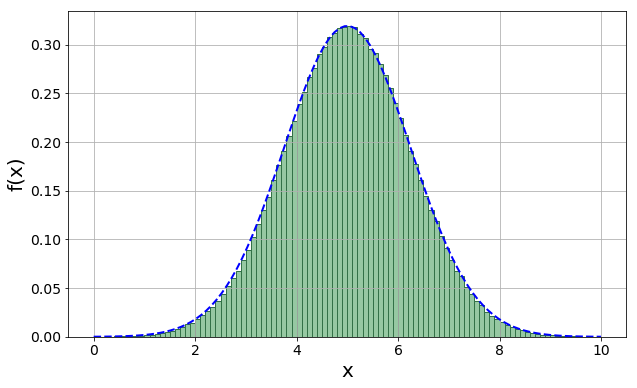

In [37]:
# collect 10^6 values from the PDF using accept/reject

xvals = []

xvals.append(accept_reject(normal_distribution, xmin, xmax, args=(5, 1.23), Pmax=Pmax, accept_count=0, total_count=0))

for n in range(10**6-1):
    xvals.append(accept_reject(normal_distribution, xmin, xmax, args=(5, 1.23), Pmax=Pmax))
    

# plot the results in a histogram

plt.figure(figsize=(10,6))

my_histogram(xvals, 100, normal_distribution, args=(mean, sd))

# plot the probability distribution for comparison

x = np.linspace(xmin, xmax, 100)

plt.plot(x, normal_distribution(x, mean, sd), 'b--', linewidth=2)
plt.xlabel('x', fontsize=20)
plt.ylabel('f(x)', fontsize=20)
plt.grid('on')
plt.tick_params(labelsize=14);

In [38]:
# print the acceptance rate
print(accept_reject.accept_count, ' accepted draws and ', accept_reject.total_count-accept_reject.accept_count, 
      ' rejected draws. There was a ', accept_reject.accept_count/accept_reject.total_count*100, 
      '% acceptance rate observed. \n\n', sep='')

# print the take taken to call np.random.rand()
%timeit np.random.rand()

1000000 accepted draws and 2248168 rejected draws. There was a 30.786584930336115% acceptance rate observed. 


638 ns ± 36.3 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


Draw 10 uniformly distributed random numbers and add them to generate a new random number. Repeat the experiment $10^4$ times and plot the resulting distribution in the figure above.

In [39]:
def sum_uniform(xmin, xmax):
    '''
    Samples 10 random numbers from a uniform distribution in the range xmin to xmax
    Return the sum
    '''
    x = np.random.uniform(xmin, xmax, 10)
    
    return np.sum(x)

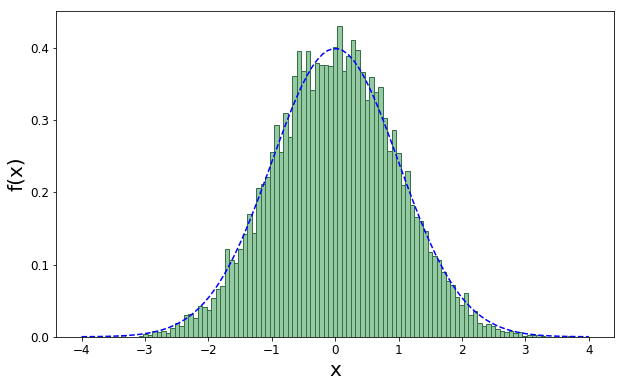

In [47]:
# reset the parameters
sd = 1
mean = 0
xmin = mean - 4*sd
xmax = mean + 4*sd

# get 10^4 samples using the summation method
xvals = []

for n in range(10**4):
    xvals.append(sum_uniform(xmin, xmax))
    
xvals = np.array(xvals)

#plot the results
plt.figure(figsize=(10,6))
plt.hist(xvals/7.5, bins=100, normed=True, facecolor='#96C8A2', edgecolor='#337147');


# plot the PDF for comparison
x = np.linspace(xmin, xmax, 100)

plt.plot(x, normal_distribution(x, mean, sd), 'b--')
plt.xlabel('x', fontsize=20)
plt.ylabel('f(x)', fontsize=20)
plt.tick_params(labelsize=12);

### 1.3 PDFs and CDFs

The time to conduct a routine maintenence check on a machine has a CDF given in the table below

| t, in minutes           | 0.0 | 5.0  | 10.0 | 15.0 | 20.0 | 25.0 | 30.0 |
|-------------------------|-----|------|------|------|------|------|------|
| CDF, fraction completed | 0.0 | 0.03 | 0.08 | 0.21 | 0.38 | 0.8  | 0.9  |

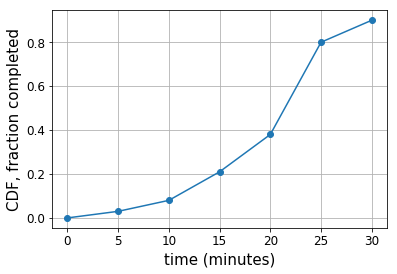

In [48]:
# plot the CDF
t = np.array([0,5,10,15,20,25,30])
CDF = np.array([0,0.03, 0.08, 0.21, 0.38,0.8,0.9])

plt.plot(t, CDF, 'o-')
plt.grid('on')
plt.xlabel('time (minutes)', fontsize=15)
plt.ylabel('CDF, fraction completed', fontsize=15);
plt.tick_params(labelsize=12);


What fraction of maintainance checks are completed in 15 minutes or less?

What fraction of maintainence checks take longer than 30 minutes?

What fraction takes between 10 and 15 minutes?

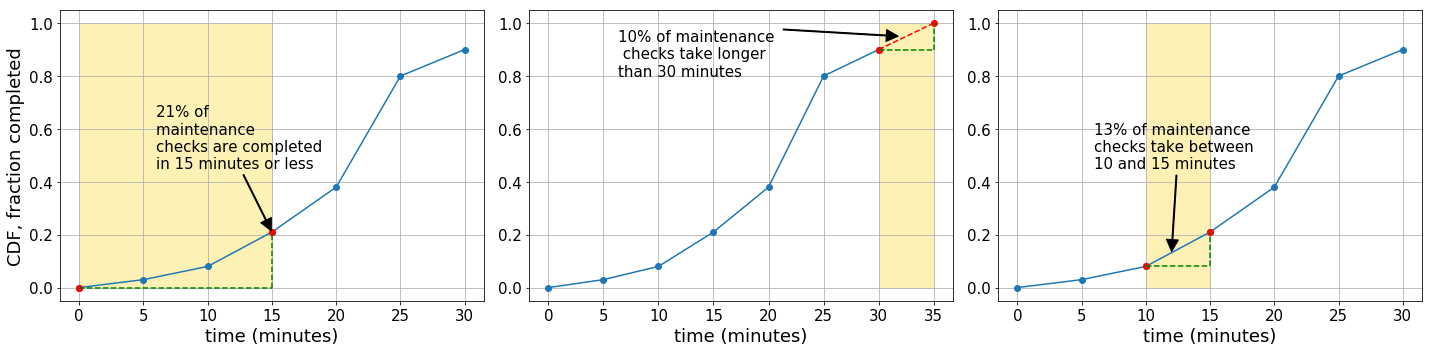

In [50]:
# create annotated figures to answer the questions above

f, ax = plt.subplots(1,3, figsize=(20,5))


# What fraction of maintainance checks are completed in 15 minutes or less?
ax[0].fill_between(np.linspace(0,15,10),0,1, color='#FEF1B5')
ax[0].plot(t, CDF, 'o-')
ax[0].plot([t[0],t[3]], [CDF[0],CDF[3]], 'ro')
ax[0].plot(np.linspace(0,15,10), np.zeros(10), 'g--')
ax[0].plot(np.ones(10)*15, np.linspace(0,0.21,10), 'g--')
ax[0].grid('on')
ax[0].set_xlabel('time (minutes)', fontsize=18)
ax[0].set_ylabel('CDF, fraction completed', fontsize=18);
ax[0].tick_params(labelsize=15);
ax[0].annotate('21% of \nmaintenance \nchecks are completed \nin 15 minutes or less',xytext=(6, 0.45),
               xy=(15, 0.21), fontsize=15, arrowprops=dict(facecolor='black', shrink=0.02, width=1))

# What fraction of maintainence checks take longer than 30 minutes?
ax[1].fill_between(np.linspace(30,35,10),0,1, color='#FEF1B5')
ax[1].plot(t, CDF, 'o-')
ax[1].plot([30,35], [0.9,1], 'ro--')
ax[1].plot(np.linspace(30,35,10), np.ones(10)*0.9, 'g--')
ax[1].plot(np.ones(10)*35, np.linspace(0.9,1,10), 'g--')
ax[1].grid('on')
ax[1].set_xlabel('time (minutes)', fontsize=18)
#ax[1].set_ylabel('CDF, fraction completed', fontsize=18);
ax[1].tick_params(labelsize=15)
ax[1].annotate('10% of maintenance \n checks take longer \nthan 30 minutes',xytext=(6.3, 0.8),
               xy=(32, 0.95), fontsize=15, arrowprops=dict(facecolor='black', shrink=0.02, width=1))


# What fraction takes between 10 and 15 minutes?
ax[2].fill_between(np.linspace(10,15,10),0,1, color='#FEF1B5')
ax[2].plot(t, CDF, 'o-')
ax[2].plot(t[2:4], CDF[2:4], 'ro')
ax[2].plot(np.linspace(10,15,10), np.ones(10)*0.08, 'g--')
ax[2].plot(np.ones(10)*15, np.linspace(0.08,0.21,10), 'g--')
ax[2].set_xlabel('time (minutes)', fontsize=18)
#ax[2].set_ylabel('CDF, fraction completed', fontsize=18);
ax[2].grid('on')
ax[2].tick_params(labelsize=15)
ax[2].annotate('13% of maintenance \nchecks take between \n10 and 15 minutes',xytext=(6, 0.45),
               xy=(12, 0.13), fontsize=15, arrowprops=dict(facecolor='black', shrink=0.02, width=1))
plt.tight_layout()
plt.show()

## 2 Markov Chain

Analytically find the limiting distribution of the walker's state

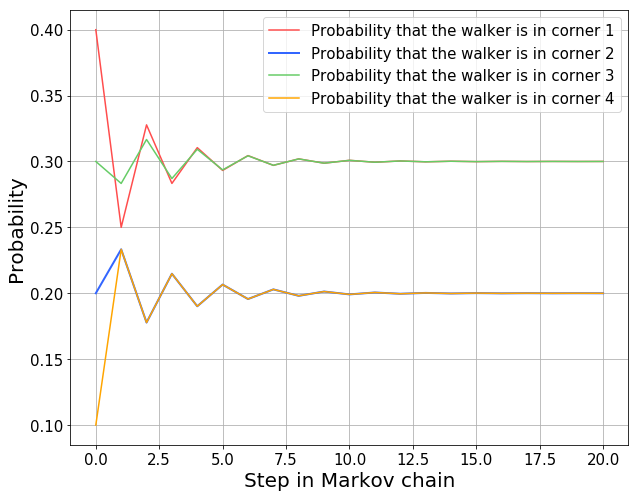

In [75]:
P = np.array([[0,1/3,1/3,1/3],[1/2,0,1/2,0],[1/3,1/3,0,1/3],[1/2,0,1/2,0]])
x = np.array([0.4,0.2,0.3,0.1])

# run through the Markov Chain 20 times to identify the limiting distribution
# track the proabability for each corner in four separate lists

corner1 = [x[0]]
corner2 = [x[1]]
corner3 = [x[2]]
corner4 = [x[3]]

for n in range(20):
    
    x = np.dot(x,P)

    corner1.append(x[0])
    corner2.append(x[1])
    corner3.append(x[2])
    corner4.append(x[3])

# plot the Markov chain results for each corner
plt.figure(figsize=(10,8))
plt.plot(corner1, label = 'Probability that the walker is in corner 1', color = '#ff4d4d')
plt.plot(corner2, label = 'Probability that the walker is in corner 2', color = '#3366ff', linewidth=2)
plt.plot(corner3, label = 'Probability that the walker is in corner 3', color='#66cc66')
plt.plot(corner4, label = 'Probability that the walker is in corner 4', color='#FFA500')
plt.grid('on')
plt.xlabel('Step in Markov chain', fontsize=20)
plt.ylabel('Probability', fontsize=20)
plt.tick_params(labelsize=15)
plt.legend(loc=1, fontsize=15);
    

Compute this result by directly simulating the Markov chain for each corner. Take 550 draws of the chain for each case and discard the first 50 results (the "burn-in" period). Plot your results in a four panel figure and for each panel show the theoretical stational probability. 

In [76]:
def random_walk_chain(initial_position, numDraws):
    '''
    Simulates a random walk through the edged square
    
    Parameters:
    - initial position: the corner numbers to start the walker in
    - numDraws: the number of draws in the Markov chain
    '''
    
    # this dict stores the possible paths from each corner
    positions ={1:[2,3,4], 2:[1,3], 3:[4,1,2], 4:[1,3]}
    
    current_position = initial_position
    
    # this dict will keep track of how many times the walker arrives in each corner
    count = {1:0, 2:0, 3:0, 4:0}

    chain = []
    
    # simulate the random walk
    for n in range(numDraws):
        
        # np.random.choice returns one of the possible positions in the list for
        # that corner, each with equal probability
        current_position = np.random.choice(positions[current_position])
        
        # discard the first 50 draws
        if n>50:
            chain.append(current_position)
            count[current_position] +=1
            
    return chain, count

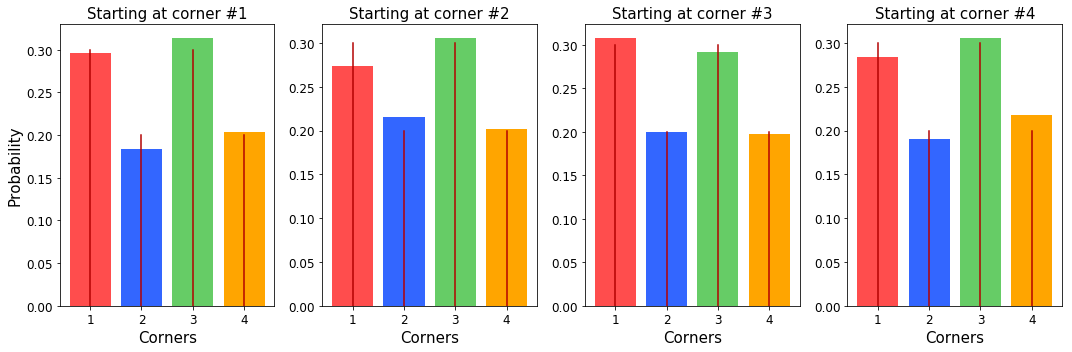

In [77]:
# Collect and plot the results for each corner
f, ax = plt.subplots(1,4, figsize=(15,5))

numDraws = 550
actualCounted = numDraws-50
predictions = (0.3,0.2,0.3,0.2)

ax[0].set_ylabel('Probability', fontsize=15)

# Run through each starting position (1,2,3,4) 
# collect the chain and plot the results
for n in range(1,5):
    
    chain, count = random_walk_chain(n,numDraws)
    
    ax[n-1].set_title('Starting at corner #' + str(n), fontsize=15)
    ax[n-1].bar(1,count[1]/actualCounted, color = '#ff4d4d')
    ax[n-1].bar(2,count[2]/actualCounted, color = '#3366ff')
    ax[n-1].bar(3,count[3]/actualCounted, color='#66cc66')
    ax[n-1].bar(4,count[4]/actualCounted, color='#FFA500')
    
    ax[n-1].plot(np.ones(10)*1, np.linspace(0,predictions[0],10), '-', color = '#b30000')
    ax[n-1].plot(np.ones(10)*2, np.linspace(0,predictions[1],10), '-', color = '#b30000')
    ax[n-1].plot(np.ones(10)*3, np.linspace(0,predictions[2],10), '-', color = '#b30000')
    ax[n-1].plot(np.ones(10)*4, np.linspace(0,predictions[3],10), '-', color = '#b30000')
    
    ax[n-1].set_xlabel('Corners', fontsize=15)
    
    ax[n-1].tick_params(labelsize=12);

    plt.tight_layout()



### 2.2 Markov Processes in Business

A company is considering using Markov theory to analyze brand switching between three different brands of phones. Survey data has been gathered and has been used to estimate the transition matrix $P$ below.

In [78]:
# store the transition matrix
P = np.array([[0.8,0.1,0.1],[0.03,0.95,0.02], [0.2,0.05,0.75]])

The current (month 1) market shares are (0.45,0.23,0.3) for brands 1, 2, and 3 respectivly. What will be the expected market shares after two months have elapsed?

In [79]:
month1 = np.array([0.45,0.25,0.3])

month2 = np.dot(month1,P)
print('Month 2 = ',month2, '\n')

month3 = np.dot(month2,P)
print('Month 3 = ',month3)

Month 2 =  [ 0.4275  0.2975  0.275 ] 

Month 3 =  [ 0.405925  0.339125  0.25495 ]


What is the long-run prediction for the expected market share for each of the three brands?

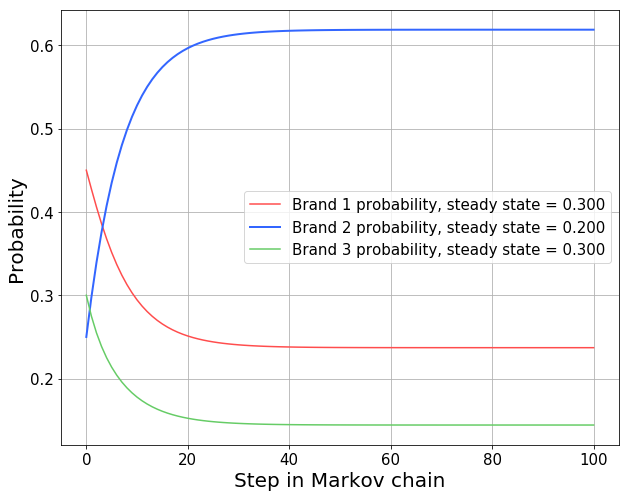

In [84]:
# run through the Markov chain for 100 samples 
# to find the the limiting distribution
P = np.array([[0.8,0.1,0.1],[0.03,0.95,0.02], [0.2,0.05,0.75]])
x = np.array([0.45,0.25,0.30])

corner1 = [x[0]]
corner2 = [x[1]]
corner3 = [x[2]]

for n in range(100):
    
    x = np.dot(x,P)
    corner1.append(x[0])
    corner2.append(x[1])
    corner3.append(x[2])
 
# plot the results for each of the brands
plt.figure(figsize=(10,8))
plt.plot(corner1, label = 'Brand 1 probability, steady state = {:0.3f}'.format(c1[-1]), color = '#ff4d4d')
plt.plot(corner2, label = 'Brand 2 probability, steady state = {:0.3f}'.format(c2[-1]), color = '#3366ff', linewidth=2)
plt.plot(corner3, label = 'Brand 3 probability, steady state = {:0.3f}'.format(c3[-1]), color='#66cc66')
plt.grid('on')
plt.xlabel('Step in Markov chain', fontsize=20)
plt.ylabel('Probability', fontsize=20)
plt.tick_params(labelsize=15)
plt.legend(loc=5, fontsize=15);


## 3 Markov Chain Monte Carlo

Write code to simulate a "random-walk" Metropolis algorithm for a distribution $\omega = \exp(-2x^2)$. 

In [85]:
def w(x):
    '''
    Returns the probability that x would be draws from the PDF used in this section
    '''
    return np.exp(-0.2*x*x)

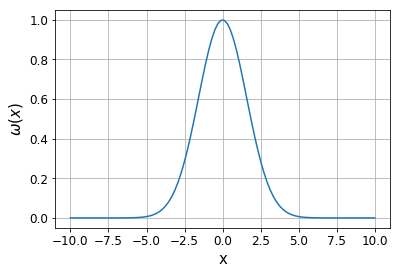

In [87]:
# plot the PDF to help visualize the problem
x = np.linspace(-10,10,100)

plt.plot(x, w(x))
plt.ylabel('$\omega(x)$', fontsize=15)
plt.xlabel('x', fontsize=15)

plt.grid('on')
plt.tick_params(labelsize=12);

In [88]:
def RWM_point(xn, delta, prob, count):
    '''
    Returns a single point from the probability distribution given using
    the "random-walk" Metropolis algorithm.
    
    Parameters:
    - xn: (float) the current value of x in the chain
    - delta: (float) the range from which to select random numbers used to increment
             from xn to xtry = xn + delta_n
    - prob: (function) the probability distribution to sample from
    - count: (integer) the current number of accepted values
    '''
    
    # generate "xtry"
    delta_n = np.random.uniform(-delta, delta)
    
    xt = xn + delta_n

    # calculate the acceptance probability
    omega = prob(xt)/prob(xn)
    
    # complete the accept/reject process
    if omega >= 1:
  
        return xt, count+1
    
    else:
        r = np.random.rand()
        
        if r < omega:

            return xt, count+1
        
        else:
  
            return xn, count
    

In [89]:
def RWM_chain(x0, delta, prob, numiter):
    '''
    Collect a chain of values from the probability distribution given using 
    the "random-walk" Metropolis algorithm.
    
    Parameters:
    - x0: (float) the initial value for the chain
    - delta: (float) the range from which to select random numbers used to increment
             from xn to xtry = xn + delta_n
    - prob: (function) the probability distribution to sample from
    - numiter: (integer) the number of values required for the chain
    '''
    
    # collect the chain of values and time the process
    start = time.clock() # start timer ------------------------------
    xvals = [x0]

    count = 0

    value = x0
    for n in range(numiter):

        value, count = RWM_point(value, delta, prob, count)
        xvals.append(value)
        
    stop = time.clock() # stop timer --------------------------------

    # calculate the mean and acceptance rate
    acceptance = count/numiter
    mean = np.abs(np.mean(xvals))
    
    return xvals, mean, acceptance, stop - start
    

In [95]:
# assess how changing delta affects acceptance rate
delta = np.linspace(0.5,10,11)

print(' -------------------------')
print('| delta\t| acceptance  rate|')
print(' -------------------------')
for d in delta:
    xvals, mean, acceptance, t = RWM_chain(0, d, w, 10000)
    print('|{:6.3f}\t|     {:0.4f}      |'.format(d, acceptance))
print(' -------------------------')

 -------------------------
| delta	| acceptance  rate|
 -------------------------
| 0.500	|     0.9412      |
| 1.450	|     0.8255      |
| 2.400	|     0.7153      |
| 3.350	|     0.6134      |
| 4.300	|     0.5224      |
| 5.250	|     0.4437      |
| 6.200	|     0.3983      |
| 7.150	|     0.3562      |
| 8.100	|     0.3063      |
| 9.050	|     0.2806      |
|10.000	|     0.2530      |
 -------------------------


Run your code for $x_0=1$

(i) How many trials were necessary before the desired distribution is reached? In other words, how does the mean value $\bar{x}$ evolve with the number of MCMC steps?

In [107]:
# Let's try 100 chains, increasing the number of MCMC steps
numiter = [n for n in range(100,50000,100)]

# tracking the mean for each chain and the time taken to calculate
MCMC_time_list = []
MCMC_mean_list = []

for n in numiter:

    xvals, mean, acceptance, t = RWM_chain(0, 6.2, w, n)
    
    MCMC_mean_list.append(mean)
    
    MCMC_time_list.append(t)

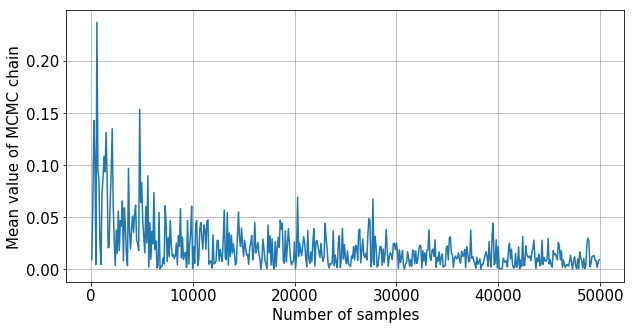

In [99]:
# plot the result
plt.figure(figsize=(10,5))
plt.plot(numiter, MCMC_mean_list)
plt.grid('on')
plt.xlabel('Number of samples', fontsize=15)
plt.ylabel('Mean value of MCMC chain', fontsize=15);
plt.tick_params(labelsize=15);

(ii) For 5000 trials, plot your results as a histogram.

The acceptance rate was: 0.389


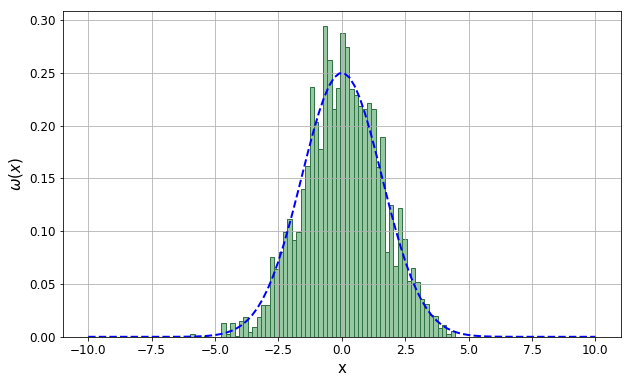

In [100]:
# get the chain for 5000 MCMC steps
xvals, mean, acceptance,t = RWM_chain(0, 6.2, w, 5000)

# print the acceptance rate
print('The acceptance rate was:',acceptance)

# plot the results
plt.figure(figsize=(10,6))
plt.grid('on')
plt.plot(x, w(x)/4, 'b--', linewidth=2)
plt.hist(xvals,bins=60, normed=True, facecolor='#96C8A2', edgecolor='#337147');
plt.ylabel('$\omega(x)$', fontsize=15)
plt.xlabel('x', fontsize=15)
plt.tick_params(labelsize=12);

The acceptance rate was: 0.39873333333333333


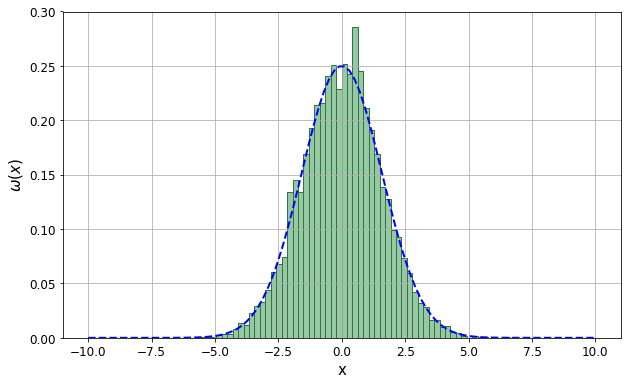

In [101]:
# for comparison, get the chain for 15000 MCMC steps
xvals, mean, acceptance,t = RWM_chain(0, 6.2, w, 15000)

# print the acceptance rate
print('The acceptance rate was:',acceptance)

# plot the results
plt.figure(figsize=(10,6))
plt.grid('on')
plt.plot(x, w(x)/4, 'b--', linewidth=2) # W is divided by 4 to normalize the distribution
plt.hist(xvals,bins=60, normed=True, facecolor='#96C8A2', edgecolor='#337147');
plt.ylabel('$\omega(x)$', fontsize=15)
plt.xlabel('x', fontsize=15)
plt.tick_params(labelsize=12);

(iii) Compare the speed of the direct MC method and the Random-Walk Metropolis

In [111]:
# Next we get the time taken for accept/reject MC increasing the number of samples collected
DMC_numiter = [n for n in range(10,10000,100)]

# store the computing time and mean in a list
DMC_time_list = []
DMC_mean_list = []

# set the parameters for accept/reject
sd = np.sqrt(2.5)
mean = 0
xmin = mean - 4*sd
xmax = mean + 4*sd

# collect the mean of each sequence and collecting time for each numiter
for n in DMC_numiter:
    xvals = []
    
    start = time.clock() # start timer here ---------------------------------

    for m in range(n):
     
        xvals.append((accept_reject(w, xmin, xmax, Pmax=1, total_count=0, accept_count=0)))
    
    stop = time.clock() # stop timer here ---------------------------------
    
    DMC_mean_list.append(np.abs(np.mean(xvals)))
    DMC_time_list.append(stop-start)

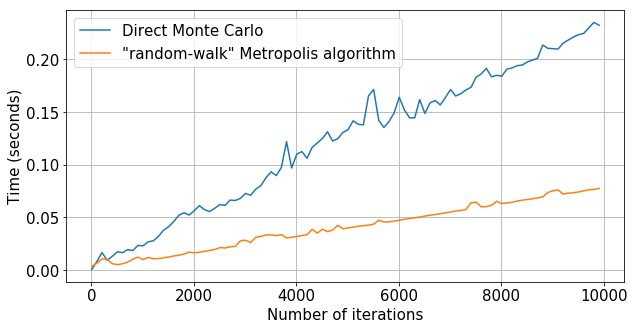

In [112]:
# plot the time results for comparison

plt.figure(figsize=(10,5))
plt.plot(DMC_numiter, DMC_time_list, label='Direct Monte Carlo');
plt.plot(DMC_numiter, MCMC_time_list[0:100], label = '"random-walk" Metropolis algorithm');
plt.xlabel('Number of iterations', fontsize=15)
plt.grid('on')
plt.legend(loc='best', fontsize=15)
plt.ylabel('Time (seconds)', fontsize=15);
plt.tick_params(labelsize=15);

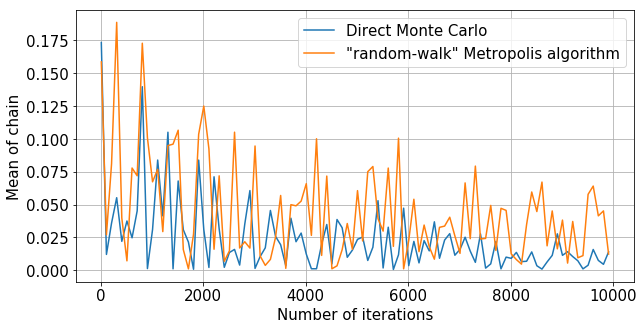

In [114]:
# plot the mean results for comparison

plt.figure(figsize=(10,5))
plt.plot(DMC_numiter, DMC_mean_list, label='Direct Monte Carlo');
plt.plot(DMC_numiter, MCMC_mean_list[0:100], label = '"random-walk" Metropolis algorithm');
plt.xlabel('Number of iterations', fontsize=15)
plt.grid('on')
plt.legend(loc='best', fontsize=15)
plt.ylabel('Mean of chain', fontsize=15);
plt.tick_params(labelsize=15);

### 3.2 The Metropolis Hastings Algorithm: Poorly-mixed and well-mixed chains

Let us consider the PDF:
$$P(x) = C x^{-5/2}e^{-2/x}$$

In [115]:
def PDF32(x):
    '''
    Returns the probability that x will be drawn from PDF from section 3.2
    '''
    
    return x**(-5/2)*np.exp(-2/x)

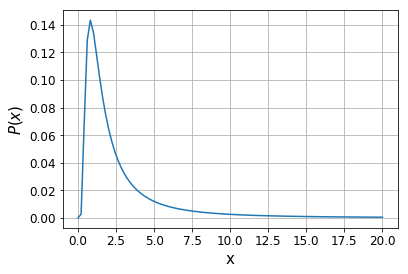

In [117]:
# plot the PDF to aid with visualization

x = np.linspace(0.0001,20,100)

plt.plot(x, PDF32(x))

plt.grid('on')
plt.xlabel('x', fontsize=15)
plt.ylabel('$P(x)$', fontsize=15)
plt.tick_params(labelsize=12);

For a symmetric proposal distribution, let us take $x_0=1$ as our starting value and suppose the proposal distribution returns a candidate value of $x*=39.82$. Write down the acceptance probability and give its numerical value. Is the new candidate likely or unlikely to be accepted?

In [118]:
x0=1
xstar = 39.82

print('The acceptance probability is:',PDF32(39.82)/PDF32(1))

The acceptance probability is: 0.000702300443244


Now take $x_0=1$ again as the starting value and plot the resulting first 500 values for x for the following proposal distributions.

*Hint: For these proposal distributions, do not generate a new test point but rather generate test points by adding a random number to the current point.*

#### A uniform distribution in $(0,100)$.

In [119]:
def MH_point(xn, prob_p, prob_q, proposal_distribution, count, args = None):
    '''
    Returns a single point from the probability distribution given using
    the Metropolis-Hastings algorithm.
    
    Parameters:
    - xn: (float) the current value of x in the chain
    - prob_p: (function) the probability distribution to sample from
    - prob_q: (function) the proposal distribution
    - count: (integer) the current number of accepted values
    - args: (tuple, optional) if the proposal distribution requires arguments,
             supply them as a tuple.

    '''
    
    # get a proposal value for x
    xtry = 0
    
    if args is None:
        xtry = proposal_distribution()
    else:
        xtry = proposal_distribution(*args)

    # calculate the acceptance ratio
    ratio = prob_p(xtry)*prob_q(xn)/(prob_p(xn)*prob_q(xtry))
    
    # impliment the accept/reject process
    alpha = np.min((1 , ratio))
    u = np.random.rand()
    
    if u < alpha:
        return xtry, count+1
    else:
        return xn, count
        

In [120]:
def MH_chain(x0, numiter, prob_p, prob_q, proposal_distribution, args = None):
    '''
    Collect a chain of values from the probability distribution given using 
    the Metropolis-Hastings algorithm.
    
    Parameters:
    - x0: (float) the initial value for the chain
    - numiter: (integer) the number of values required for the chain
    - prob_p: (function) the probability distribution to sample from
    - prob_q: (function) the proposal distribution
    - proposal_distribution: (function) the function that returns samples from the proposal distribution
    - args: (tuple, optional) if the proposal distribution requires arguments,
             supply them as a tuple.
    
    '''
    
    value = x0
    count = 0
    
    xvals = []
    
    for n in range(numiter):
        value, count = MH_point(value, prob_p, prob_q, proposal_distribution, count, args)
        xvals.append(value)
        
    acceptance = count/numiter
    
    return xvals, acceptance

In [122]:
def uniform(x):
    '''
    Returns the probability that a value will be sampled from a uniform distribution (P=1).
    Written for use in the MH_chain function.
    '''
    return 1

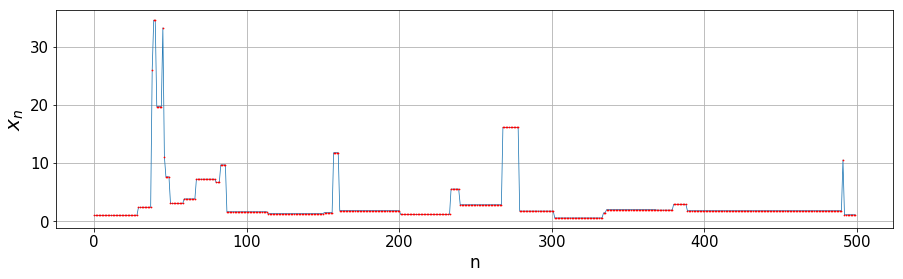

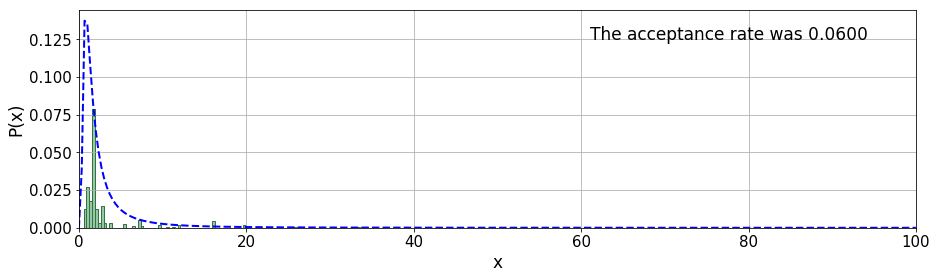

The acceptance rate was: 0.06


In [151]:
# get the chain of 500 samples using the uniform proposal distribution
xvals, acceptance = MH_chain(1, 500, PDF32, uniform, np.random.uniform, args=(0,100))

# Top panel: plot the chain 
plt.figure(figsize=(15,4))
plt.plot(xvals, 'o-', linewidth=0.75, markersize=0.75, markerfacecolor='red', markeredgecolor='red')
plt.grid('on')
plt.xlabel('n', fontsize=17)
plt.ylabel('$x_n$', fontsize=20)
plt.tick_params(labelsize=15);
plt.show()

plt.figure(figsize=(15,4))

# Bottom panel: plot a histogram of the results
my_histogram(xvals ,100, PDF32)

# plot the PDF for comparison
x = np.linspace(0.0001,100,300)
plt.grid('on')
plt.xlabel('x', fontsize=17)
plt.ylabel('P(x)', fontsize=17)
plt.tick_params(labelsize=15);
plt.plot(x, PDF32(x), 'b--', linewidth=2)
plt.xlim(0,100)

# annotate the graph
plt.annotate('The acceptance rate was {:0.4f}'.format(acceptance), xy=(61, 0.125), fontsize=17)

plt.show();

print('The acceptance rate was:',acceptance)

#### A $\chi^2$ distribution

In [141]:
def chi_squared(x, denominator = np.sqrt(2*np.pi)):
    '''
    Return the probability that x would be sampled from a chi^2 distribution
    with k = 1
    '''
    numerator = x**(-0.5)*np.exp(-x/2)

    return numerator/denominator

In [140]:
def get_chi_squared_point():
    '''
    Use direct Monte Carlo to sample from the chi^2 distribution
    '''
    return accept_reject(chi_squared, 0.001, 20, Pmax=100, total_count=0, accept_count=0)

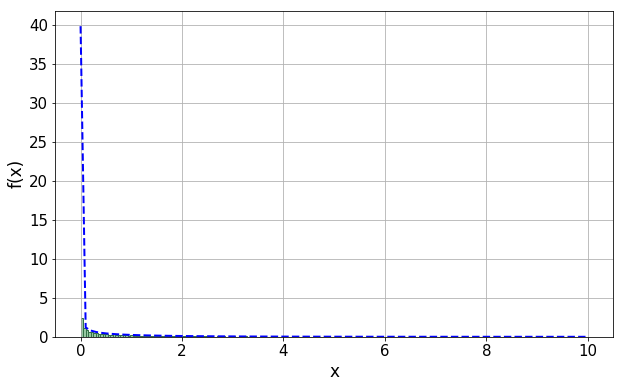

In [131]:
# sample 5000 points from the chi^2 distribution
xvals = []
for m in range(5000):
    xvals.append(get_chi_squared_point())
    
# plot the chi^2 distribution to visualize the distribution
x = np.linspace(0.0001,10,100)
plt.figure(figsize=(10,6))
plt.plot(x, chi_squared(x), 'b--', linewidth=2)

# plot a histogram of the success of the points in sampling required chi^2 distribution
my_histogram(xvals, 200, chi_squared)

plt.xlabel('x', fontsize=17)
plt.ylabel('f(x)', fontsize=17)
plt.tick_params(labelsize=15);
plt.grid('on')

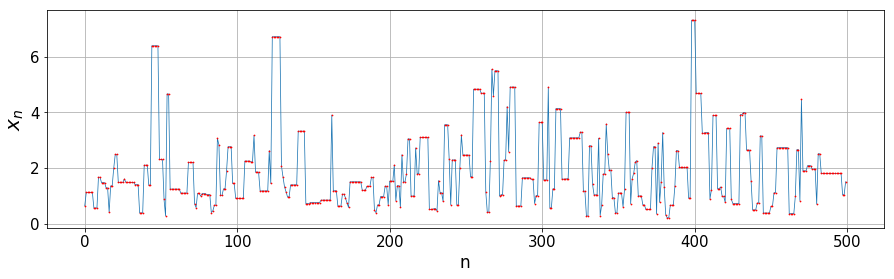

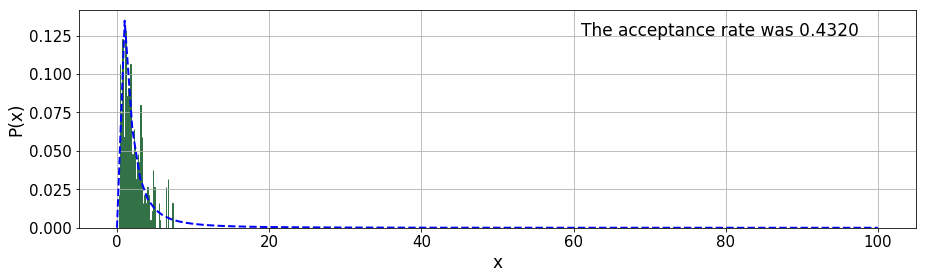

The acceptance rate was: 0.432


In [146]:
# get the chain of 10000 samples using the chi^2 proposal distribution
xvals, acceptance = MH_chain(1, 500, PDF32, chi_squared, get_chi_squared_point)

# Top panel: plot the chain 
plt.figure(figsize=(15,4))
plt.plot(xvals, 'o-', linewidth=0.75, markersize=0.75, markerfacecolor='red', markeredgecolor='red')
plt.grid('on')
plt.xlabel('n', fontsize=17)
plt.ylabel('$x_n$', fontsize=20)
plt.tick_params(labelsize=15);
plt.show()

# Bottom panel: plot a histogram of the results
plt.figure(figsize=(15,4))
my_histogram(xvals ,100, PDF32)

# plot the PDF for comparison
x = np.linspace(0.0001,100,100)
plt.grid('on')
plt.xlabel('x', fontsize=17)
plt.ylabel('P(x)', fontsize=17)
plt.tick_params(labelsize=15);

# annotate the graph
plt.annotate('The acceptance rate was {:0.4f}'.format(acceptance), xy=(61, 0.125), fontsize=17)
plt.plot(x, PDF32(x), 'b--', linewidth=2)

plt.show();

print('The acceptance rate was:',acceptance)

## 4 Simulated Annealing

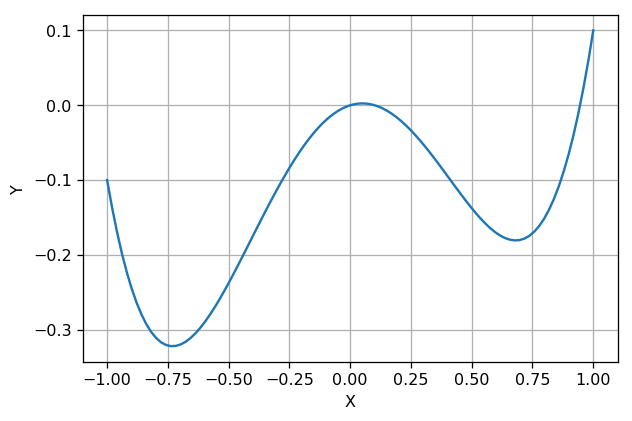

In [3]:
def double_well(x):
    '''
    Double well function for examples.
    
    Params:
        x - (float) point at which to evaluate function
    Returns:
        - (float) value at given point
    ''' 
    return x**4-x**2+0.1*x

x = np.linspace(-1,1,100)
make_plot(x_label="X", y_label="Y").plot(x, double_well(x));

To optimize this function manually, and find theoretical values to check against the simulated annealing algorithm, we take the derivative and find the zeros:

$$\frac{d}{dx}(x^4-x^2+0.1x)=4x^3-2x+0.1=0$$

In [4]:
def derivative_double_well(x):
    '''
    Derivative of double well function for rootfinding purposes.
    
    Params:
        x - (float) point at which to evaluate derivative
    Returns:
        - (float) value at given point
    ''' 
    return 4*x**3-2*x+0.1

min1 = root_find.brentq(derivative_double_well, -0.75, -0.5)
min2 = root_find.brentq(derivative_double_well, 0.5, 0.75)
print("Global minima of value y =", double_well(min1), "at point x =", min1)
print("Local minima of value y =", double_well(min2), "at point x =", min2)

Global minima of value y = -0.3219193468815589 at point x = -0.7308931031862202
Local minima of value y = -0.18058696657349232 at point x = 0.6806392764236684


In [5]:
def geometric_temp_schedule(t, n, T_0, T_f):
    '''
    Geometric temperature schedule for simulated annealing algorithms
    
    Params:
        t - (float) Time, or number of steps, at current iteration
        n - (float) Total time or number of steps being taken  
        T_0 - (float) Initial temperature
        T_f - (float) Final temperature
    Returns:
        - (float) Temperature at this point in time
    ''' 
    return np.maximum(T_0*np.power(T_f/T_0, t/n), T_f)

def wrap_boundaries(position, xlims, x_period, ylims, y_period):
    '''
    Wraps the boundaries for specified boundary conditions
    
    Params:
        position - (tuple) x and y coordinates of position. None if no limits.
        xlims - (tuple) Max and min of x interval 
        x_period - (float) Length of x interval
        ylims - (tuple) Max and min of y interval
        x_period - (float) Length of y interval
    Returns:
        position - (tuple) Wrapped x values
    ''' 
    if xlims != None: 
        temp_x = position[0] - xlims[0]
        temp_x = temp_x % x_period
        position[0] = temp_x + xlims[1] if temp_x < 0 else temp_x + xlims[0]
        
    if ylims != None: 
        temp_y = position[1] - ylims[0]
        temp_y = temp_y % y_period
        position[1] = temp_y + ylims[1] if temp_y < 0 else temp_y + ylims[0]
    
    return position

def coin_flip_sa(current_cost, T):
    '''
    Randomly returns true or false based on the ratio of a cost to temperature
    
    Params:
        current_cost - (float) Current cost value of a function
        T - (float) Current temperature of the system
    Returns:
        - (bool) Random decision
    ''' 
    return np.random.random() < np.exp(current_cost/T)

def simulated_annealing(fn, T_0=100, T_f=1e-9, temp_schedule_fn=geometric_temp_schedule,
                           initial_pos=(0,0), nsweeps=100, nsteps=100, searching_for='maxima',
                           distribution=np.random.randn, dist_args=(), xlims=None, ylims=None,
                           verbose=False):
    '''
    Simulated annealing method to find the maxima or minima of an arbitrary function.
    
    Params:
        fn - (function) Arbitrary function to optimise
        T_0 - (float) Optional. Initial temperature of the system
        T_f - (float) Optional. Final temperature of the system
        temp_schedule_fn - (Function) Optional. Temperature schedule
        initial_pos - (tuple) Optional. Inital position in function
        nsweeps - (int) Optional. Number of sweeps at each temperature
        nsteps - (int) Optional. Number of steps with new temperatures
        searching_for - (string) Optional. Switch to find max or min.
        xlims - (tuple) Optional. X limits of search range
        ylims - (tuple) Optional. Y limits of search range
        verbose - (bool) Optional. Set to true to also return positions
    Returns:
        pos - (tuple) Best solution as found after cooling
    ''' 
    # Flip function values if looking for a minimum
    optimization_multiplier = -1 if searching_for == 'maxima' else 1
    # The function is our cost function
    cost = fn(*initial_pos)*optimization_multiplier
    pos = initial_pos
    T = T_0
    x_period = xlims[1]-xlims[0] if xlims != None else 0
    y_period = ylims[1]-ylims[0] if ylims != None else 0
    if verbose: positions = []
    
    for i in range(nsteps):
        for j in range(nsweeps):
            # Generate random position to check
            temp_pos = list(wrap_boundaries(pos + distribution(*dist_args, np.size(initial_pos)), xlims, x_period, ylims, y_period))
            temp_cost = fn(*temp_pos)*optimization_multiplier
            
            # If an obviously good choice or by coin flip, update position and min cost
            if (temp_cost <= cost) or coin_flip_sa(cost-temp_cost, T):
                pos = temp_pos
                cost = temp_cost
                if verbose: positions.append(pos)
                
        # Cool temperature
        T = temp_schedule_fn(i, nsteps, T_0, T_f)
        
    if verbose:
        return pos, np.array(positions).flatten()
    else:
        return pos
    
def sm_plot(positions, font_size=22):
    '''
    Quick plot function for 2-panel figure as described in assignment.
    
    Params:
        positions - (float) Time, or number of steps, at current iteration
    ''' 
    
    f,ax = plt.subplots(1,2, figsize=(12,8))
    
    ax[0].plot(range(len(positions)), positions, 'o-', linewidth=1, markersize=2, markerfacecolor='red', markeredgecolor='red')
    ax[0].set_xlabel("Step", fontsize=font_size)
    ax[0].set_ylabel("X Position", fontsize=font_size)
    ax[0].set_title('Time Series of Walkers\' Positions', fontsize=font_size)
    ax[0].invert_yaxis()
    ax[0].grid('on')
    
    ax[1].hist(positions, color="#ffb759", ec='black', bins=50)
    ax[1].set_xlabel("Positions", fontsize=font_size)
    ax[1].set_ylabel("Number of Occurences", fontsize=font_size)
    ax[1].set_title('Histogram of Walkers\' Positions', fontsize=font_size)
    ax[1].grid('on')
    
    plt.tight_layout()
    return

-0.239735325914


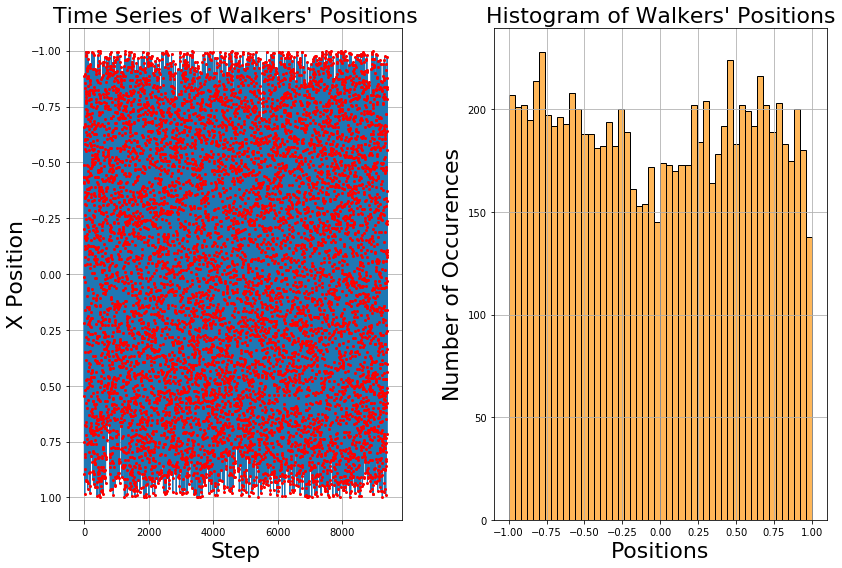

In [6]:
T=1
optimum, positions = simulated_annealing(double_well, initial_pos=[0], xlims=(-1,1), T_0=T, T_f=T, 
                                          distribution=np.random.uniform, dist_args=[-1,1], 
                                          searching_for='minima', verbose=True)
print(*optimum)
sm_plot(positions)

0.74073747362


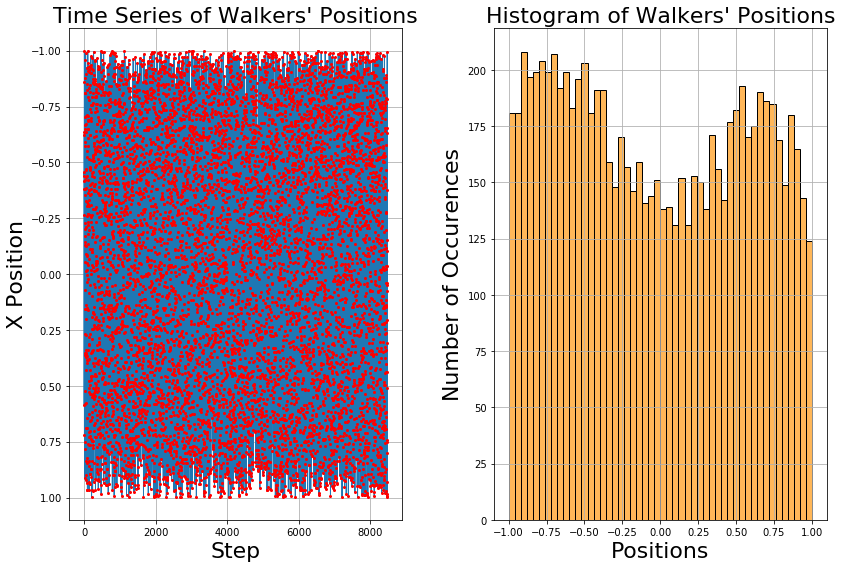

In [7]:
T=0.4
optimum, positions = simulated_annealing(double_well, initial_pos=[0], xlims=(-1,1), T_0=T, T_f=T, 
                                          distribution=np.random.uniform, dist_args=[-1,1], 
                                          searching_for='minima', verbose=True)
print(*optimum)
sm_plot(positions)

-0.760678399685


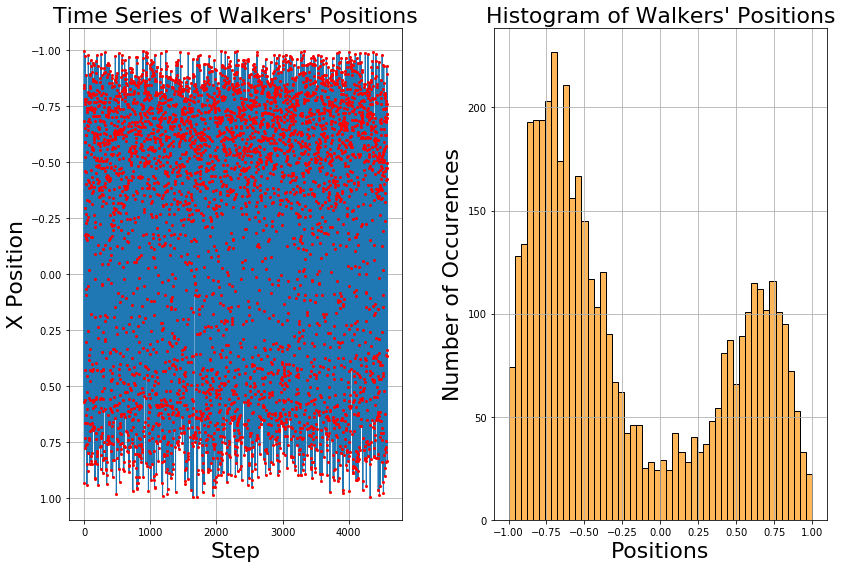

In [8]:
T=0.1
optimum, positions = simulated_annealing(double_well, initial_pos=[0], xlims=(-1,1), T_0=T, T_f=T, 
                                          distribution=np.random.uniform, dist_args=[-1,1], 
                                          searching_for='minima', verbose=True)
print(*optimum)
sm_plot(positions)

-0.731402310607


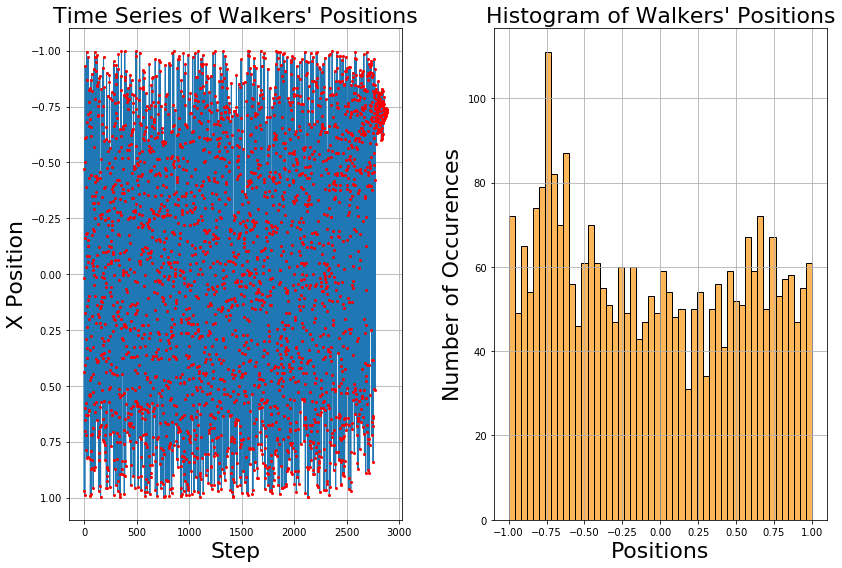

In [9]:
optimum, positions = simulated_annealing(double_well, initial_pos=[0], xlims=(-1,1),
                                          distribution=np.random.uniform, dist_args=[-1,1], 
                                          searching_for='minima', verbose=True)
print(*optimum)
sm_plot(positions)

Where the temperature is at $T=1$, we see that the walker is free to move nearly anywhere. The histogram does show a slight tendency towards staying in the minima, but this is not really visible to the naked eye when looking at the time series. These results are results are consistent with the uniform distribution we're sampling from. With the temperature set to be high, all of the random jumps have a high probability of being accepted. When running the simulation multiple times, this temperature at which there is the highest variance between the returned optimum. 

At $T=0.4$, we can see that the distribution is more similar to the original function, with peaks around the general locations of the local minima in the histogram. The time series plot appears to have some weighting towards this distribution as well, but the pattern is not very perceptible. 

Once we drop to $T=0.1$, the pattern that we saw is more perceptible. The histrogram is similar to a reflection alond the x axis of the original function, and the time series representation is obviously more biased to the larger local optimum. We can still see that, even though the walker is biased to that region, it's still able to jump out of the minima often enough to roam around the function to find other minima as well.

With a proper temperature schedule, we see a mixture of all of the above. The distribution in the histogram is more flat overall, but has a large spike in the local maximum. The time series representation very clearly shows how the function gets stuck in the glabal minimum towards the end of the steps being taken. Overall, the gradual decrease in temperature allowed the walker to slowly hone in on the true global minimu, while still being able to travel enough to not get stuck in the other, local minimum. The temperature schedule also required the fewest number of points, something which speaks well for the runtime.

## 4.1 The travelling Salesman (TSP) route optimization

In [10]:
def recursive_iteration(element, indexes, points, tour, cost_fn, min_cost, min_tour, verbose=False):
    '''
    Protected recursive method to iterate through all of the possible state
    values for a tour of the specified points.
    
    Params:
        element - (int) Element of state which we're changing
        indexes - (array-like) Available indexes to choose from
        points - (array-like) List of city coordinates
        tour - (array-like) The order which we're visiting the cities in
        cost_fn - (function) Cost function to benchmark results.
        min_cost - (float) Current lowest cost
        min_tour - (array-like) Corresponding lowest cost tour
        verbose - (bool) Optional. Set to true to return frames in progress
    Returns:
        min_cost - (float) Best solution cost as found after cooling.
                            Needed for communication between recursive calls
        min_tour - (array-like) Best solution as found after cooling.
    ''' 
    if verbose: frames = []
    for j, i in enumerate(indexes):
        tour[element] = i # Set current element to a certain 
        
        if element == len(points) - 1:
            # Only if we have a complete state, check solution against best recorded
            temp_cost = cost_fn(points, tour)
            
            if verbose: frames.append(points[tour])
            
            if temp_cost < min_cost:
                min_cost = temp_cost
                min_tour = list(tour)
                
        else:
            # If we're not at the end yet, do a depth first approach towards valid solns.
            # Also, mask out the indexes element that we've just used so that we don't
            # go to the same city twice
            index_mask = np.ones(len(indexes), dtype=bool)
            index_mask[j] = 0
            
            if verbose: 
                # Go to the next recursive step
                min_cost, min_tour, temp_frames = recursive_iteration(element+1, indexes[index_mask], 
                                                                      points, list(tour), cost_fn, min_cost, 
                                                                      min_tour, verbose=True)
                frames.extend(temp_frames)
            else:
                min_cost, min_tour = recursive_iteration(element+1, indexes[index_mask], points, list(tour), 
                                                         cost_fn, min_cost, min_tour)
    
    # When all choices have been made at this depth, pop back up one step and go to the next iteration
    if verbose:
        return min_cost, min_tour, frames
    else:
        return min_cost, min_tour

def brute_force_path_optimization(points, cost_fn, verbose=False):
    '''
    Recursive method controller to iterate through all possible tour states.
    
    Params:
        points - (array-like) Points in question to optimize the route
        cost_fn - (function) Function that determines the worth of a state
        verbose - (bool) Optional. Set to true to return frames from progress
    Returns:
        min_tour - (array-like) Best solution
    '''
    tour = np.zeros(len(points) + 1, dtype=int) # Initial tour
    indexes = np.arange(1, len(points)) # Available city indexes
    current_cost = cost_fn(points, tour) # Current cost
    
    # Initial values for best tour
    min_tour = np.append(np.arange(len(points)), 0)
    min_cost = cost_fn(points, min_tour)
     
    if verbose:
        min_cost, min_tour, frames = recursive_iteration(1, indexes, points, list(tour), cost_fn, min_cost, min_tour, verbose=True)  
        return min_tour, frames
    else:
        min_cost, min_tour = recursive_iteration(1, indexes, points, list(tour), cost_fn, min_cost, min_tour) 
        return min_tour

In [11]:
def geometric_temp_schedule(t, n, T_0, T_f):
    '''
    Geometric temperature schedule for simulated annealing algorithms
    
    Params:
        t - (float) Time, or number of steps, at current iteration
        n - (float) Total time or number of steps being taken  
        T_0 - (float) Initial temperature
        T_f - (float) Final temperature
    Returns:
        - (float) Temperature at this point in time
    ''' 
    return np.maximum(T_0*np.power(T_f/T_0, t/n), T_f)

def random_tour_swap(tour):
    '''
    Randomly swaps any two states with equal probabilities
    
    Params:
        tour - (array-like) current solution to the problem
    Returns:
        temp_tour - (array-like) solution with two randomly swapped values
    '''
    temp_tour = tour[:]
    index1, index2 = np.random.choice(np.arange(tour.size)[1:-1], 2)
    temp_tour[index1], temp_tour[index2] = temp_tour[index2], temp_tour[index1]
    return temp_tour

def coin_flip_tsp(current_cost, next_cost, T):
    '''
    Coin flip function for disadvatageous moves
    
    Params:
        current_cost - (float) Current cost of solution
        next_cost - (float) Cost of temp solution
        T - (float) Current temperature of the system
    Returns:
        - (bool) True if accepted
    '''
    return np.random.random() < np.exp(-(next_cost-current_cost)/T)

def distance_cost(points, tour):
    '''
    Determines cost of a solution by the length of a path
    
    Params:
        points - (array-like) City coordinates
        tour - (array-like) Current solution
    Returns:
        cost - (float) sum of path length
    '''
    temp_tour = np.roll(tour, -1)
    temp = (points[tour, 0] - points[temp_tour, 0])**2
    temp1 = (points[tour, 1] - points[temp_tour, 1])**2
    cost = np.sum(np.sqrt(temp+temp1))
    return cost
    
def simulated_annealing_optimization(points, cost_fn, T_0=0.1, T_f=0.0001, 
                        temp_schedule_fn=geometric_temp_schedule, 
                        nsteps=100, nsweeps=10, verbose=False):
    '''
    Simulated annealing optimization function. Runs a temperature schedule
    to hone in on the best solution using random swaps
    
    Assumes that first city in the list is the 'home' city.
    
    Params:
        points - (array-like) City coordinates
        cost_fn - (function) Arbitrary function to optimise
        T_0 - (float) Optional. Initial temperature of the system
        T_f - (float) Optional. Final temperature of the system
        temp_schedule_fn - (Function) Optional. Temperature schedule
        nsteps - (int) Optional. Number temperatures
        nsweeps - (int) Optional. Number of sweeps at each temperature
        verbose - (bool) Optional. Set to true to also return frames
    Returns:
        min_tour - (array-like) Best solution as found after cooling
    '''
    T = T_0
    tour = np.append(np.arange(points.shape[0]), 0) # Initial tour
    current_cost = cost_fn(points, tour)
    if verbose: frames = []
    
    min_cost = cost_fn(points, tour)
    min_tour = tour[:]
    
    for i in range(1, nsteps+1):
        for i in range(nsweeps):
            # Randomly test new solution
            temp_tour = random_tour_swap(tour)
            temp_cost = cost_fn(points, temp_tour)
            
            if temp_cost < current_cost:
                # if solution is obviously better, accept it
                current_cost = temp_cost
                tour = temp_tour
                
                if verbose: frames.append(points[tour])
                
                # save the best case, since it's easy to jump away with this function
                if temp_cost < min_cost:
                    min_cost = temp_cost
                    min_tour = list(temp_tour)

            elif coin_flip_tsp(current_cost, temp_cost, T):
                # if solution is not better, decide whether to accept it
                current_cost = temp_cost
                tour = temp_tour
                if verbose: frames.append(points[tour])
        
        # lower temperature ever step
        T = temp_schedule_fn(i, nsteps, T_0, T_f)
        
    if verbose:
        return min_tour, frames
    else:
        return min_tour

In [12]:
def greedy_optimization(points, cost_fn, verbose=False):
    '''
    Greedy optimization algorithm which always takes the point which is the closest next.
    
    Params:
        points - (array-like) City coordinates
        cost_fn - (function) Method defining state value
        verbose - (bool) Optional. Set to true to also return frames
    Returns:
        tour - (array-like) Solution found
    '''
    unused_points_mask = np.ones(len(points), dtype=bool)
    unused_points_mask[0] = 0
    indexes = np.arange(len(points))
    tour = np.zeros(len(points), dtype=int)
    if verbose: frames = []
    
    for i in range(1, len(points)):
        temp_tour = list(tour) # copy list to avoid aliasing
        temp_tour[i] = indexes[unused_points_mask][0] # grab first available index
        best_cost = cost_fn(points, temp_tour)
        best_point = 0
        
        if verbose: frames.append(points[temp_tour])
        
        # Search for closest point among those available        
        for j in range(1, len(indexes[unused_points_mask])-1):
            temp_tour[i] = indexes[unused_points_mask][j]

            if cost_fn(points, temp_tour) < best_cost:
                best_point = j
        
        # Make the best point official, mark it as unavailable, and move on to next iteration
        tour[i] = indexes[unused_points_mask][best_point]
        unused_points_mask[indexes[unused_points_mask][best_point]] = False
        
    # Guarantee a round trip
    tour = np.append(tour, 0)
    if verbose:
        frames.append(points[tour])
        frames = np.array(frames)
        return tour, frames
    else:
        return tour

In [13]:
def bnb_recursive_iteration(element, indexes, points, tour, cost_fn, min_cost, min_tour):
    '''
    Branch and bound method of solving this. Extremely similar to brute force.
    In hindsight, not the best suited solution to this problem, but still works just fine.
    
    Params:
        element - (int) Element of state which we're changing
        indexes - (array-like) Available indexes to choose from
        points - (array-like) List of city coordinates
        tour - (array-like) The order which we're visiting the cities in
        cost_fn - (function) Cost function to benchmark results.
        min_cost - (float) Current lowest cost
        min_tour - (array-like) Corresponding lowest cost tour
        verbose - (bool) Optional. Set to true to return frames in progress
    Returns:
        min_cost - (float) Best solution cost as found after cooling.
                            Needed for communication between recursive calls
        min_tour - (array-like) Best solution as found after cooling.
    ''' 
    for j, i in enumerate(indexes):
        tour[element] = i
        temp_cost = cost_fn(points, tour)

        if element == len(points) - 1:
            # Only do solution comparison with a valid, full state
            if temp_cost < min_cost:
                min_cost = temp_cost
                min_tour = list(tour)
        else:
            # The key to branch and bound. Trim branches that are obviously bad.
            if temp_cost > min_cost:
                continue
            
            index_mask = np.ones(len(indexes), dtype=bool)
            index_mask[j] = 0
            min_cost, min_tour = recursive_iteration(element+1, indexes[index_mask], points, list(tour), cost_fn, min_cost, min_tour)
    
    return min_cost, min_tour

def branch_and_bound_path_optimization(points, cost_fn):
    '''
    Recursive method controller to iterate through state tree for
    branch and bound solution.
    
    Params:
        points - (array-like) Points in question to optimize the route
        cost_fn - (function) Function that determines the worth of a state
    Returns:
        min_tour - (array-like) Best solution
    '''
    tour = np.zeros(len(points) + 1, dtype=int) # Initial tour
    indexes = np.arange(1, len(points))
    current_cost = cost_fn(points, tour)
    
    min_tour = np.append(np.arange(len(points)), 0)
    min_cost = cost_fn(points, min_tour)
    
    # Start recursion with best solution seed (to avoid a depth first search for a valid solution)
    min_cost, min_tour = bnb_recursive_iteration(1, indexes, points, list(tour), cost_fn, min_cost, min_tour)  
    
    return min_tour

C: 4.21811468023


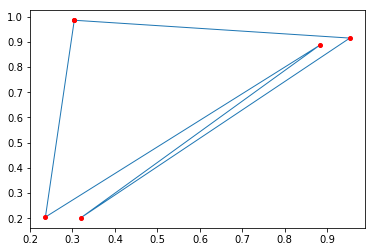

C: 2.48237923349


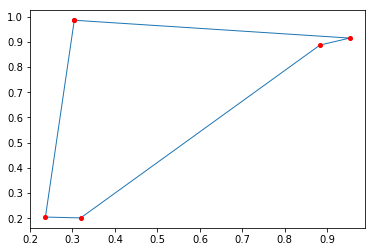

In [14]:
%matplotlib inline

npoints = 5
points = np.random.rand(npoints, 2)
tour = np.append(np.arange(points.shape[0]), 0)
print("C:", distance_cost(points, tour))
x, y = points[tour, 0], points[tour, 1]
plt.plot(x, y, 'o-', linewidth=1, markersize=4, markerfacecolor='red', markeredgecolor='red')
plt.show()

tour = branch_and_bound_path_optimization(points, distance_cost)
print("C:", distance_cost(points, tour))

x, y = points[tour, 0], points[tour, 1]
plt.plot(x, y, 'o-', linewidth=1, markersize=4, markerfacecolor='red', markeredgecolor='red');

C: 5.51628709209


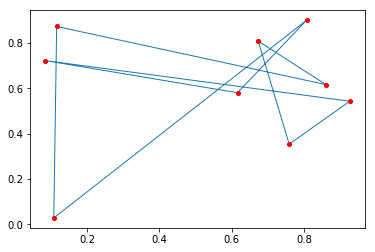

C: 3.19228429725


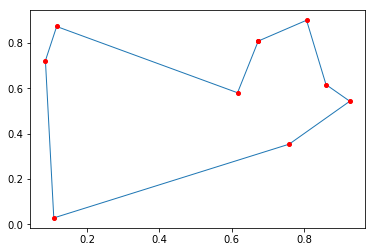

In [15]:
%matplotlib inline

npoints = 9
points = np.random.rand(npoints, 2)
tour = np.append(np.arange(points.shape[0]), 0)
print("C:", distance_cost(points, tour))
x, y = points[tour, 0], points[tour, 1]
plt.plot(x, y, 'o-', linewidth=1, markersize=4, markerfacecolor='red', markeredgecolor='red')
plt.show()

tour = brute_force_path_optimization(points, distance_cost)
print("C:", distance_cost(points, tour))

x, y = points[tour, 0], points[tour, 1]
plt.plot(x, y, 'o-', linewidth=1, markersize=4, markerfacecolor='red', markeredgecolor='red');

C: 3.00429457943


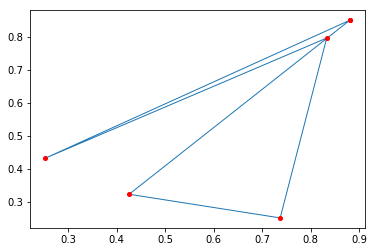

C: 2.75087142038


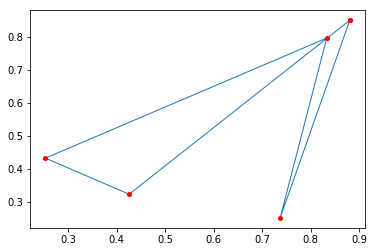

In [16]:
%matplotlib inline

npoints = 5
points = np.random.rand(npoints, 2)
tour = np.append(np.arange(points.shape[0]), 0)
print("C:", distance_cost(points, tour))
x, y = points[tour, 0], points[tour, 1]
plt.plot(x, y, 'o-', linewidth=1, markersize=4, markerfacecolor='red', markeredgecolor='red')
plt.show()

tour = greedy_optimization(points, distance_cost)
print("C:", distance_cost(points, tour))

x, y = points[tour, 0], points[tour, 1]
plt.plot(x, y, 'o-', linewidth=1, markersize=4, markerfacecolor='red', markeredgecolor='red');

2.76593348182


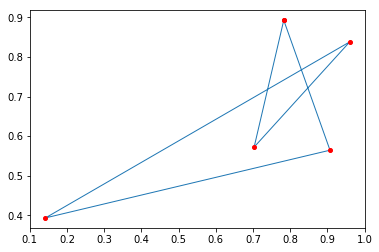

2.06961138503


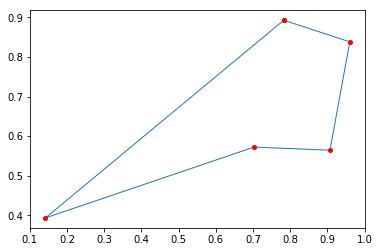

In [17]:
%matplotlib inline

npoints = 5
points = np.random.rand(npoints, 2)
tour = np.append(np.arange(points.shape[0]), 0)
print(distance_cost(points, tour))
x, y = points[tour, 0], points[tour, 1]
plt.plot(x, y, 'o-', linewidth=1, markersize=4, markerfacecolor='red', markeredgecolor='red')
plt.show()

tour = simulated_annealing_optimization(points, distance_cost)
print(distance_cost(points, tour))

x, y = points[tour, 0], points[tour, 1]
plt.plot(x, y, 'o-', linewidth=1, markersize=4, markerfacecolor='red', markeredgecolor='red');

In [18]:
npoints = 5
points = np.random.rand(npoints, 2)

%timeit branch_and_bound_path_optimization(points, distance_cost)
%timeit brute_force_path_optimization(points, distance_cost)
%timeit greedy_optimization(points, distance_cost)
%timeit simulated_annealing_optimization(points, distance_cost)

2.78 ms ± 97.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
2.54 ms ± 122 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
598 µs ± 35.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
120 ms ± 16.4 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Animations and Figures

In [19]:
def update_line(data, line):
    '''
    Method which updates a single line for animations.
    
    Params:
        data - (array-like) data for a single line. Must be uniform in size.
        line - (object) line object to modify
    Returns:
        line - (object) line object to plot
    '''
    line.set_data(data[:, 0], data[:, 1])
    return line,

def data_gen():
    '''
    Generator. Depends on global variable called 'data'. Meant for animations.
    '''
    for d in data[1:]:
        yield d

def generate_plot_object(data, title):
    #Source: https://matplotlib.org/examples/animation/simple_3danim.html
    fig, ax = plt.subplots()
    line, = ax.plot(data[0, :, 0], data[0, :, 1], 'o-', linewidth=1, markersize=4, markerfacecolor='red', markeredgecolor='red')

    # Setting the axes properties
    ax.set_xlim(0, 1)
    ax.set_xlabel('X')

    ax.set_ylim(0, 1)
    ax.set_ylabel('Y')

    ax.set_title(title)
    
    return fig, line

def generate_four_panel_plot(data, font_size=22):
    '''
    Quick plot function for 4-panel to showcase different stages of the travelling 
    salesman problem animations.
    
    Params:
        positions - (float) Time, or number of steps, at current iteration
    ''' 
    frame1 = data[0]
    frame2 = data[len(data)//4]
    frame3 = data[(3*len(data))//4]
    frame4 = data[-1]
    
    f,ax = plt.subplots(2,2, figsize=(12,8))
    
    ax[0, 0].plot(frame1[:, 0], frame1[:, 1], 'o-', linewidth=1, markersize=4, markerfacecolor='red', markeredgecolor='red')
    ax[0, 0].set_xlabel("X", fontsize=font_size)
    ax[0, 0].set_ylabel("Y", fontsize=font_size)
    ax[0, 0].set_title('Initial State', fontsize=font_size)
    
    ax[0, 1].plot(frame2[:, 0], frame2[:, 1], 'o-', linewidth=1, markersize=4, markerfacecolor='red', markeredgecolor='red')
    ax[0, 1].set_xlabel("X", fontsize=font_size)
    ax[0, 1].set_ylabel("Y", fontsize=font_size)
    ax[0, 1].set_title('Just Started', fontsize=font_size)
    
    ax[1, 0].plot(frame3[:, 0], frame3[:, 1], 'o-', linewidth=1, markersize=4, markerfacecolor='red', markeredgecolor='red')
    ax[1, 0].set_xlabel("X", fontsize=font_size)
    ax[1, 0].set_ylabel("Y", fontsize=font_size)
    ax[1, 0].set_title('Nearly Completed', fontsize=font_size)
    
    ax[1, 1].plot(frame4[:, 0], frame4[:, 1], 'o-', linewidth=1, markersize=4, markerfacecolor='red', markeredgecolor='red')
    ax[1, 1].set_xlabel("X", fontsize=font_size)
    ax[1, 1].set_ylabel("Y", fontsize=font_size)
    ax[1, 1].set_title('Returned Solution', fontsize=font_size)
    
    plt.tight_layout()
    return

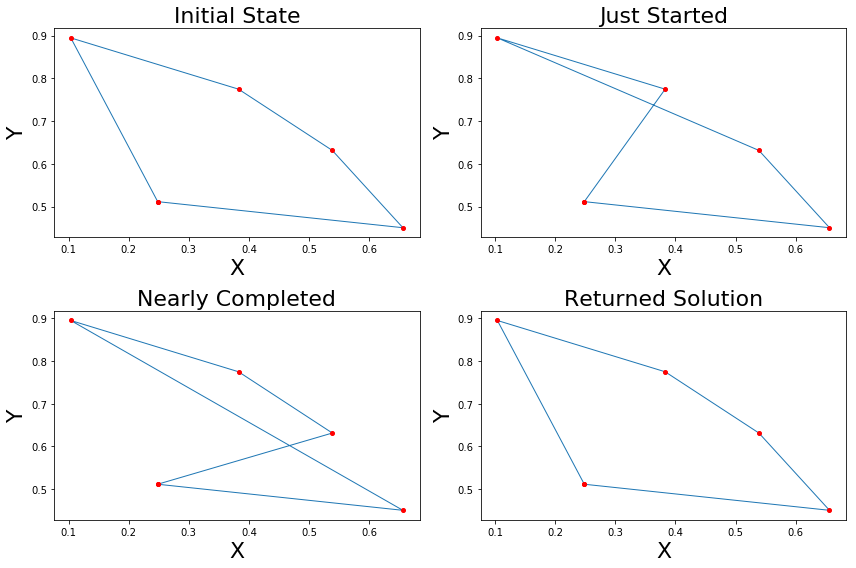

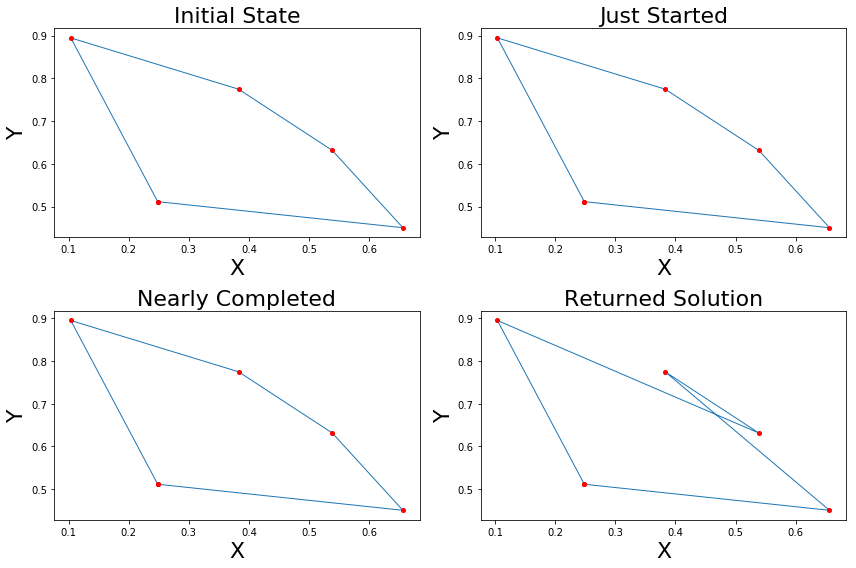

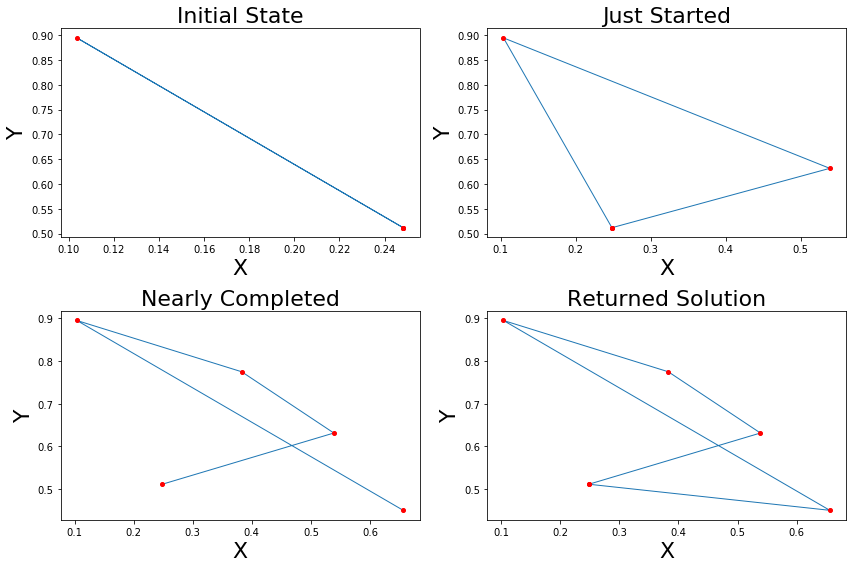

In [20]:
%matplotlib inline
npoints = 5
points = np.random.rand(npoints, 2)

tour, bf_data = brute_force_path_optimization(points, distance_cost, verbose=True)
bf_data.append(points[tour])
generate_four_panel_plot(bf_data)

tour, sa_data = simulated_annealing_optimization(points, distance_cost, nsteps=20, verbose=True)
sa_data.append(points[tour])
generate_four_panel_plot(sa_data)

tour, g_data = greedy_optimization(points, distance_cost, verbose=True)
generate_four_panel_plot(g_data)



<IPython.core.display.Javascript object>


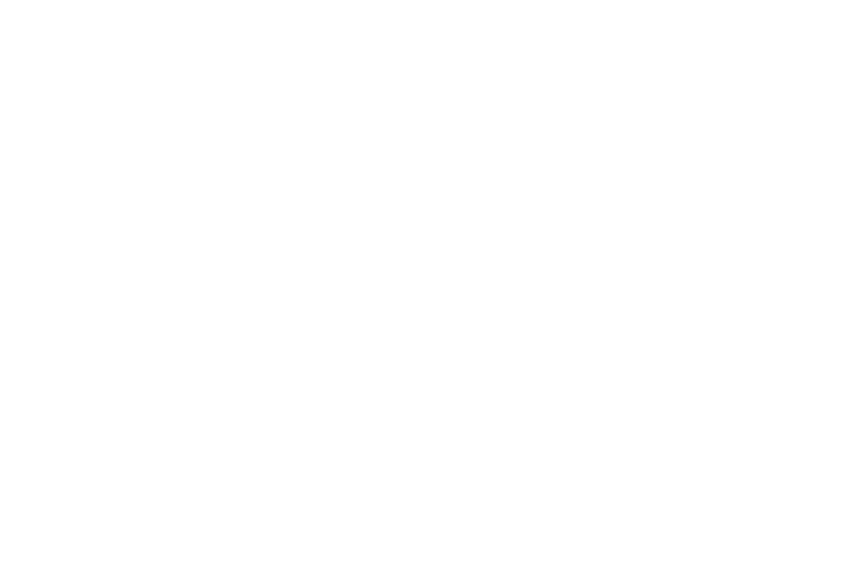

/Users/becky/anaconda/lib/python3.5/site-packages/matplotlib/animation.py:1021: UserWarning: MovieWriter ffmpeg unavailable
  warnings.warn("MovieWriter %s unavailable" % writer)


<IPython.core.display.Javascript object>


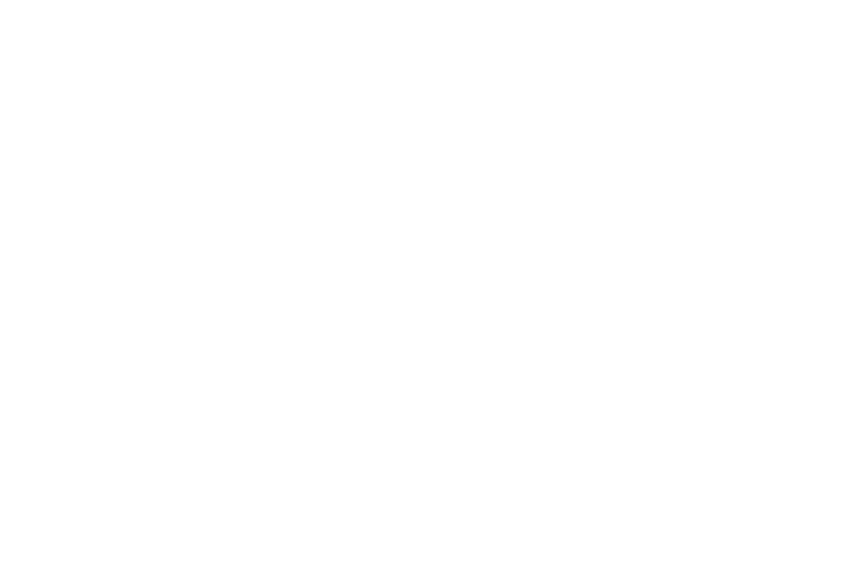

In [22]:
# Calls twice here because of this known bug: https://github.com/ipython/ipython/issues/10873
%matplotlib notebook
%matplotlib notebook

fig, line = generate_plot_object(np.array(bf_data), 'Travelling Salesman: Brute Force Optimization')
data = bf_data
bf_ani = animation.FuncAnimation(fig, update_line, data_gen, fargs=(line,), interval=300, repeat_delay=500);

if libraries_installed: bf_ani.save('brute-force.mp4', fps=2, extra_args=['-vcodec', 'libx264'])

<IPython.core.display.Javascript object>


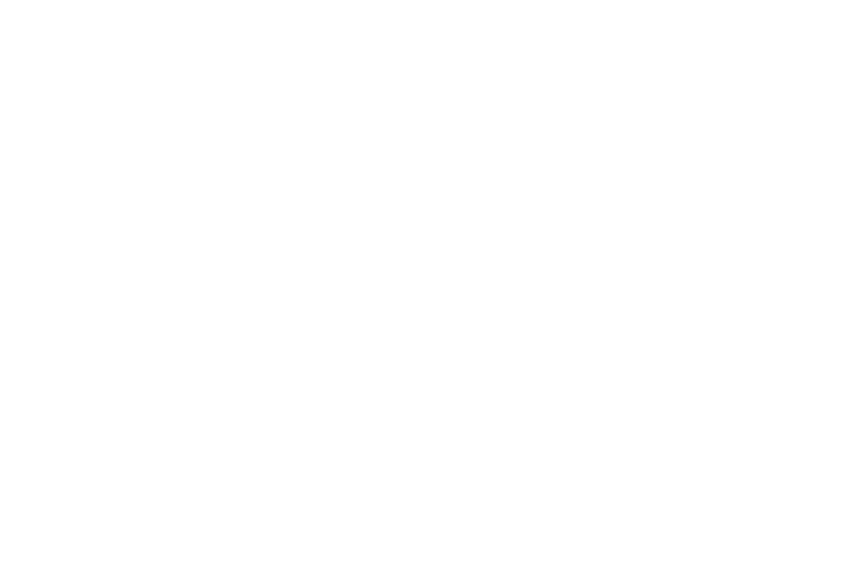

/Users/becky/anaconda/lib/python3.5/site-packages/matplotlib/animation.py:1021: UserWarning: MovieWriter ffmpeg unavailable
  warnings.warn("MovieWriter %s unavailable" % writer)


<IPython.core.display.Javascript object>


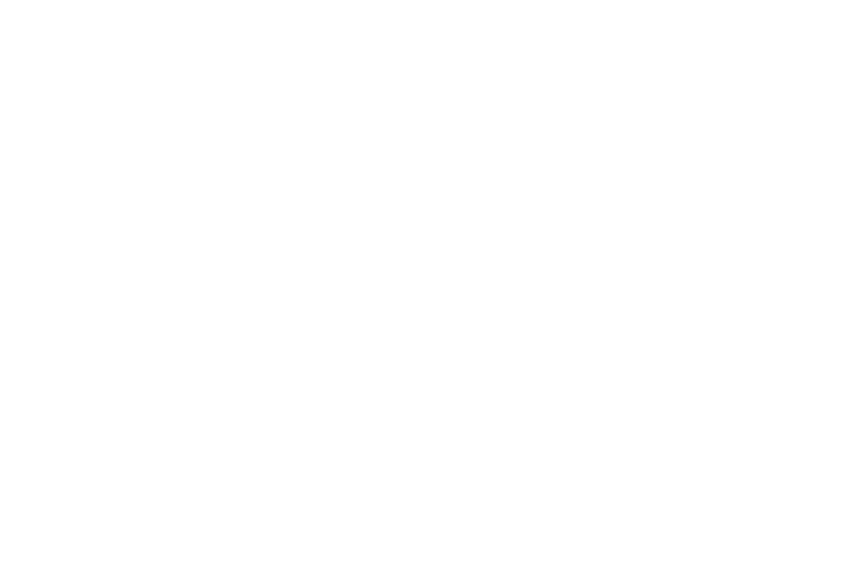

In [23]:
# Calls twice here because of this known bug: https://github.com/ipython/ipython/issues/10873
# If it still doesn't work properly, just try refreshing
%matplotlib notebook
%matplotlib notebook


fig, line = generate_plot_object(np.array(sa_data), 'Travelling Salesman: Simulated Annealing Optimization')
data = sa_data
sa_ani = animation.FuncAnimation(fig, update_line, data_gen, fargs=(line,), interval=300, repeat_delay=500);

if libraries_installed: sa_ani.save('simulated-annealing.mp4', fps=2, extra_args=['-vcodec', 'libx264'])

<IPython.core.display.Javascript object>


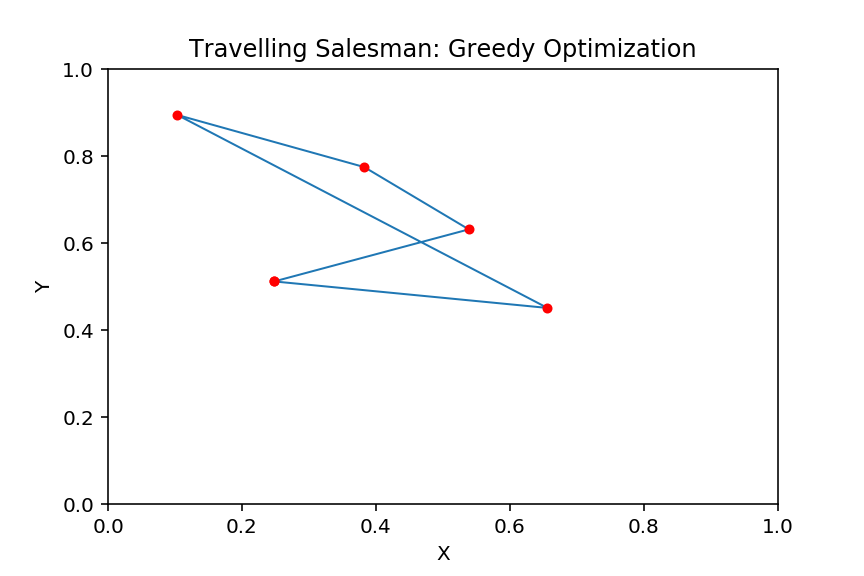

/Users/becky/anaconda/lib/python3.5/site-packages/matplotlib/animation.py:1021: UserWarning: MovieWriter ffmpeg unavailable
  warnings.warn("MovieWriter %s unavailable" % writer)


In [24]:
# Calls twice here because of this known bug: https://github.com/ipython/ipython/issues/10873
%matplotlib notebook
%matplotlib notebook

def generate_plot_object_custom(data):
    '''
    This method is needed because for whatever reason, the array accesses for
    the first line creation weren't working specifically for the greedy algorithm.
    '''
    fig, ax = plt.subplots()
    line, = ax.plot(data[0][:, 0], data[0][:, 1], 'o-', linewidth=1, markersize=4, markerfacecolor='red', markeredgecolor='red')

    # Setting the axes properties
    ax.set_xlim(0, 1)
    ax.set_xlabel('X')

    ax.set_ylim(0, 1)
    ax.set_ylabel('Y')

    ax.set_title('Travelling Salesman: Greedy Optimization')
    
    return fig, line

fig, line = generate_plot_object_custom(np.array(g_data))
data = g_data
greedy_ani = animation.FuncAnimation(fig, update_line, data_gen, fargs=(line,), interval=300, repeat_delay=500);

if libraries_installed: greedy_ani.save('greedy.mp4', fps=2, extra_args=['-vcodec', 'libx264'])